In [1]:
get_ipython().run_line_magic('matplotlib', 'inline')
import os, sys

# sys.path.append("~/X/PythonForDataScience/air_traffic_project/submissions/first_real_submission/")

import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from problem import *
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.decomposition import PCA
import geopy.distance
from sklearn.metrics import mean_squared_error
from model_selection_python import *
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance


from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

from estimator import _merge_external_data
from keras.wrappers.scikit_learn import KerasRegressor

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from keras.metrics import RootMeanSquaredError

from xgboost import XGBRegressor
import xgboost as xgb


pd.set_option('display.max_columns', None)

In [2]:
X_train, y_train = get_train_data('..')
X_test, y_test = get_test_data('..')

X_train_merged = _merge_external_data(X_train)
X_test_merged = _merge_external_data(X_test)

In [3]:
features_to_keep = ['WeeksToDeparture', 'std_wtd', 'Days_to_departure', 'route_mean',
       'n_days_departure', 'day_nb_mean', 'day_mean', 'week_mean',
       'month_mean', 'oil_stock_price', 'oil_stock_volume', 'AAL_stock_price',
       'AAL_stock_volume', 'SP_stock_price', 'SP_stock_volume', 'distance',
       'total_arr', 'flights_arr', 'booth_arr', 'mean_per_flight_arr']

X_train_data = X_train_merged[features_to_keep]
X_test_data = X_test_merged[features_to_keep]

In [4]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.1,
               alpha = 10, n_estimators = 100)
xg_reg.fit(X_train_data, y_train)

preds = xg_reg.predict(X_test_data)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.413071


In [5]:
data_dmatrix = xgb.DMatrix(data=X_train_data,label=y_train)

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,9.497637,0.004370,9.497680,0.019083
1,8.555437,0.003538,8.555291,0.019014
2,7.708492,0.003181,7.708917,0.018781
3,6.947722,0.003360,6.947829,0.018828
4,6.263237,0.003233,6.263427,0.017698
5,5.647191,0.002681,5.647904,0.017113
6,5.093505,0.002262,5.094276,0.016599
7,4.595771,0.003540,4.596272,0.016749
8,4.149641,0.003958,4.150377,0.017007
9,3.748774,0.004532,3.750349,0.018974


## HyperParameter Search

In [6]:
from hyperopt import hp

# XGB parameters
xgb_reg_params = {
    'learning_rate':    hp.choice('learning_rate',    np.arange(0.05, 0.31, 0.025)),
    'max_depth':        hp.choice('max_depth',        np.arange(5, 16, 1, dtype=int)),
    'min_child_weight': hp.choice('min_child_weight', np.arange(1, 8, 1, dtype=int)),
    'colsample_bytree': hp.choice('colsample_bytree', np.arange(0.5, 1.0, 0.1)),
    'subsample':        hp.uniform('subsample', 0.8, 1),
    'n_estimators':     hp.choice('n_estimators', np.arange(200, 351, 25)),
#     'booster': hp.choice('booster', ['gbtree', 'gblinear', 'dart'])
}
xgb_fit_params = {
    'eval_metric': 'rmse',
    'early_stopping_rounds': 10,
    'verbose': False
}

xgb_para = dict()
# xgb_para['learning_rate'] = 0.075
xgb_para['reg_params'] = xgb_reg_params
xgb_para['fit_params'] = xgb_fit_params
xgb_para['loss_func' ] = lambda y, pred: np.sqrt(mean_squared_error(y, pred))

In [7]:
import xgboost as xgb
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials


class HPOpt(object):

    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test  = x_test
        self.y_train = y_train
        self.y_test  = y_test

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result, trials

    def xgb_reg(self, para):
        reg = xgb.XGBRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def lgb_reg(self, para):
        reg = lgb.LGBMRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def ctb_reg(self, para):
        reg = ctb.CatBoostRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def train_reg(self, reg, para):
        reg.fit(self.x_train, self.y_train,
                eval_set=[(self.x_train, self.y_train), (self.x_test, self.y_test)],
                **para['fit_params'])
        pred = reg.predict(self.x_test)
        loss = para['loss_func'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}

obj = HPOpt(X_train_data, X_test_data, y_train, y_test)

xgb_opt = obj.process(fn_name='xgb_reg', space=xgb_para, trials=Trials(), algo=tpe.suggest, max_evals=100)


100%|██████████| 100/100 [04:10<00:00,  2.50s/trial, best loss: 0.3463840858145822]


In [8]:
results, trials = xgb_opt

In [9]:
results

{'colsample_bytree': 2,
 'learning_rate': 1,
 'max_depth': 8,
 'min_child_weight': 5,
 'n_estimators': 2,
 'subsample': 0.9835357416111667}

In [16]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.7, learning_rate=0.075, 
                          n_estimators=250, max_depth=13, min_child_weight=6, subsample=0.98, booster='gbtree')
xg_reg.fit(X_train_data, y_train)

preds = xg_reg.predict(X_test_data)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.345003


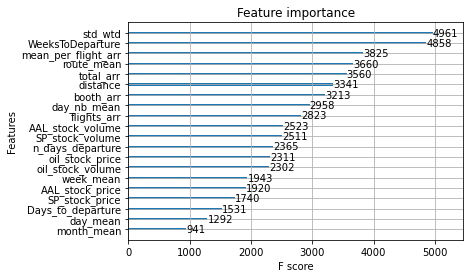

In [13]:
xgb.plot_importance(xg_reg)
# plt.rcParams['figure.figsize'] = [15, 15]
plt.show()

RMSE: 0.347445 - Dart
RMSE: 0.345003 - Gbtree